### 초기설정

In [ ]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
import pandas as pd

df_2023 = pd.read_excel('/content/2023.xlsx')
df_2024 = pd.read_excel('/content/2024.xlsx')

In [ ]:
country_map = {
    1: '일본',
    2: '중국',
    3: '홍콩',
    4: '싱가포르',
    5: '대만',
    6: '태국',
    7: '말레이시아',
    8: '호주',
    9: '미국',
    10: '캐나다',
    11: '영국',
    12: '독일',
    13: '프랑스',
    14: '러시아',
    15: '중동',
    16: '인도',
    17: '필리핀',
    18: '인도네시아',
    19: '베트남',
    20: '몽골',
    97: '기타'
}

df_2023['국가명'] = df_2023['D_NAT'].map(country_map)
df_2024['국가명'] = df_2024['D_NAT'].map(country_map)

- 활동명 매핑 (주요활동/만족활동) - 2023~2024

In [ ]:
# 1. 활동명 매핑
q8a_mapping_2023 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "고궁/역사 유적지 방문",
    "Q8a05": "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", "Q8a06": "박물관, 전시관 관람",
    "Q8a07": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", "Q8a08": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q8a09": "지역 축제 참여", "Q8a10": "유흥(나이트라이프 활동 및 카지노 등)", "Q8a11": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a12": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a13": "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)",
    "Q8a14": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a15": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a16": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a17": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a18": "연수, 교육, 연구", "Q8a19": "기타"
}

q8b_code_mapping_2023 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", 6: "박물관, 전시관 관람",
    7: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", 8: "연극, 뮤지컬, 발레 등 공연 관람",
    9: "지역 축제 참여", 10: "유흥(나이트라이프 활동 및 카지노 등)",
    11: "오락(놀이공원 및 테마파크 방문 등)", 12: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    13: "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)", 14: "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    15: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)", 16: "국제회의(컨벤션, 국제회의, 전시 등)",
    17: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)", 18: "연수, 교육, 연구", 19: "기타"
}

q8a_cols = list(q8a_mapping_2023.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2023[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2023.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2023이 정의된 상태에서만)
df_2023["주요활동"] = df_2023.apply(get_q8a_activities, axis=1)
df_2023["만족활동"] = df_2023.apply(get_q8b_satisfaction, axis=1)

In [ ]:
# 1. 활동명 매핑
q8a_mapping_2024 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "휴양/휴식(웰니스)",
    "Q8a05": "고궁/역사 유적지 방문", "Q8a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q8a07": "박물관, 전시관 관람", "Q8a08": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    "Q8a09": "연극, 뮤지컬, 발레 등 공연 관람", "Q8a10": "지역 축제 참여",
    "Q8a11": "유흥(나이트라이프 활동 및 카지노)", "Q8a12": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q8a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a17": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a18": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a19": "연수, 교육, 연구", "Q8a20": "기타"
}

q8b_code_mapping_2024 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "휴양/휴식(웰니스)",
    5: "고궁/역사 유적지 방문", 6: "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    7: "박물관, 전시관 관람", 8: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥(나이트라이프 활동 및 카지노)", 12: "오락(놀이공원 및 테마파크 방문 등)",
    13: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", 14: "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    15: "스포츠/레포츠 관람 (야구, 축구, 농구 등)", 16: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    17: "국제회의(컨벤션, 국제회의, 전시 등)", 18: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    19: "연수, 교육, 연구", 20: "기타"
}

q8a_cols = list(q8a_mapping_2024.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2024[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2024.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2024이 정의된 상태에서만 실행)
df_2024["주요활동"] = df_2024.apply(get_q8a_activities, axis=1)
df_2024["만족활동"] = df_2024.apply(get_q8b_satisfaction, axis=1)


In [ ]:
# df_2023.drop(columns=['방문지역'], inplace=True)
# df_2024.drop(columns=['방문지역'], inplace=True)

In [ ]:
import pandas as pd

# 1. 지역 컬럼 정의
region_cols = [f"Q9_2a{str(i).zfill(2)}" for i in range(1, 18)]

# 2. 지역 코드 → 지역명 매핑
region_map = {
    1: "서울", 2: "경기", 3: "인천", 4: "강원", 5: "대전",
    6: "충북", 7: "충남", 8: "세종", 9: "경북", 10: "경남",
    11: "대구", 12: "울산", 13: "부산", 14: "광주", 15: "전북",
    16: "전남", 17: "제주"
}

# 3. 지역 리스트 추출 함수 (수정 버전)
def extract_visited_regions(row):
    visited = []
    for col in region_cols:
        val = row.get(col)
        if pd.notna(val):
            try:
                code = int(val)
                region = region_map.get(code)
                if region and region not in visited:
                    visited.append(region)
            except:
                continue
    return visited

# 4. 적용
df_2023["방문지역"] = df_2023.apply(extract_visited_regions, axis=1)
df_2024["방문지역"] = df_2024.apply(extract_visited_regions, axis=1)

# 5. 확인
print(df_2023[["pnid", "방문지역"]].head(10))
print(df_2024[["pnid", "방문지역"]].head(10))

   pnid          방문지역
0     6      [서울, 강원]
1     7          [서울]
2     8          [인천]
3    10          [서울]
4    11      [서울, 인천]
5    12          [서울]
6    14      [서울, 강원]
7    16          [경기]
8    19  [서울, 강원, 부산]
9    20      [서울, 강원]
   pnid      방문지역
0    57      [서울]
1    58      [서울]
2    59      [서울]
3    60      [서울]
4    61  [서울, 경기]
5    63  [서울, 경기]
6    64  [서울, 경기]
7    66      [서울]
8    68      [서울]
9    69      [서울]


In [ ]:
# 클러스터1 국가 리스트
cluster1_countries = ["미국", "영국", "독일", "프랑스", "캐나다", "호주", "기타"]

# 공통 국가 필터링 함수
def filter_cluster1(df):
    return df[df["국가명"].isin(cluster1_countries)].copy()

# 연도별 필터링
df_cluster1_2023 = filter_cluster1(df_2023)
df_cluster1_2024 = filter_cluster1(df_2024)

- 계절 컬럼 추가 (계절 분석 시 사용)

In [ ]:
import pandas as pd

# 월 → 계절 매핑 함수
def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:  # 12, 1, 2
        return 'Winter'

# 각 연도별 데이터프레임에 적용
# for df in [df_cluster1_2024, df_cluster1_2023, df_cluster1_2022]:
#     df['계절'] = df['D_MON'].apply(month_to_season)

for df in [df_cluster1_2024, df_cluster1_2023]:
    df['계절'] = df['D_MON'].apply(month_to_season)

- 2023년 활동 만족도 매핑 코드

In [ ]:
# 1. 활동 코드 → 활동명 매핑
q12_2023_item_mapping = {
    "Q12a01": "식도락(음식)",
    "Q12a02": "쇼핑",
    "Q12a03": "자연경관 감상",
    "Q12a04": "고궁/역사 유적지 방문",
    "Q12a05": "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "Q12a06": "박물관, 전시관 관람",
    "Q12a07": "K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문",
    "Q12a08": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q12a09": "지역 축제 참여",
    "Q12a10": "유흥(나이트라이프 활동 및 카지노 등)",
    "Q12a11": "오락(놀이공원 및 테마파크 방문 등)",
    "Q12a12": "뷰티/미용 관광 (마사지샵, 헤어샵, 네일케어 등 방문)",
    "Q12a13": "치료/건강검진(피부과, 성형외과, 내‧외과 입원, 수술 등)",
    "Q12a14": "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    "Q12a15": "스포츠/레포츠 참가(스키, 수영, 골프, 캠핑 등)"
}

# 2. 매핑 함수
def extract_activity_satisfaction_2023(row):
    satisfaction_dict = {}
    for col, activity_name in q12_2023_item_mapping.items():
        if col in row and pd.notna(row[col]):
            score = row[col]
            if isinstance(score, (int, float)) and 1 <= score <= 5:
                satisfaction_dict[activity_name] = score
    return satisfaction_dict

# 3. 적용
df_cluster1_2023["활동만족도"] = df_cluster1_2023.apply(extract_activity_satisfaction_2023, axis=1)

In [ ]:
# 1. 활동 코드 → 활동명 매핑
q12_2024_item_mapping = {
    "Q12a01": "식도락(음식/미식) 관광",
    "Q12a02": "쇼핑",
    "Q12a03": "자연경관 감상",
    "Q12a04": "휴양/휴식(웰니스)",
    "Q12a05": "고궁/역사 유적지 방문",
    "Q12a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q12a07": "박물관, 전시관 관람",
    "Q12a08": "K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문",
    "Q12a09": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q12a10": "지역 축제 참여",
    "Q12a11": "유흥(나이트라이프 활동 및 카지노)",
    "Q12a12": "오락(놀이공원 및 테마파크 방문 등",
    "Q12a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    "Q12a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q12a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    "Q12a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑, 등반, 자전거, 래프팅 등)",
}

# 2. 매핑 함수
def extract_activity_satisfaction_2024(row):
    satisfaction_dict = {}
    for col, activity_name in q12_2024_item_mapping.items():
        if col in row and pd.notna(row[col]):
            score = row[col]
            if isinstance(score, (int, float)) and 1 <= score <= 5:
                satisfaction_dict[activity_name] = score
    return satisfaction_dict

# 3. 적용
df_cluster1_2024["활동만족도"] = df_cluster1_2024.apply(extract_activity_satisfaction_2024, axis=1)

# 개별여행 여부 비율 원그래프 (TYP 컬럼 기준)

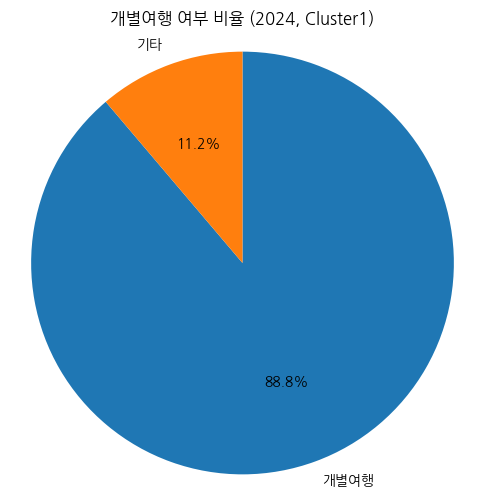

In [ ]:
import matplotlib.pyplot as plt

# 개별여행 여부 컬럼 생성
df_cluster1_2024['is_FIT'] = df_cluster1_2024['TYP'].map(lambda x: '개별여행' if x == 1 else '기타')

# 개별여행 비율 계산
fit_counts = df_cluster1_2024['is_FIT'].value_counts()
fit_counts_ratio = fit_counts / fit_counts.sum()

# 원그래프 시각화
plt.figure(figsize=(6, 6))
plt.pie(fit_counts_ratio, labels=fit_counts_ratio.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('개별여행 여부 비율 (2024, Cluster1)')
plt.axis('equal')
plt.show()

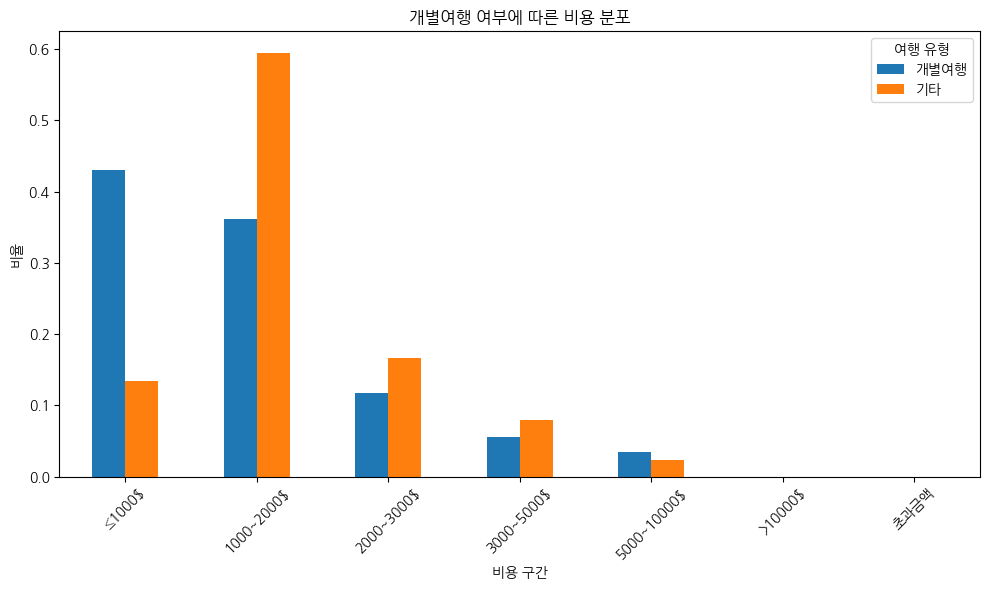

In [ ]:
import seaborn as sns
import pandas as pd

# 비용 코드 매핑
cost_map = {
    1: "≤1000$",
    2: "1000~2000$",
    3: "2000~3000$",
    4: "3000~5000$",
    5: "5000~10000$",
    6: ">10000$",
    98: "초과금액"
}

# 매핑 컬럼 생성
df_cluster1_2024['비용구간'] = df_cluster1_2024['C총액1인TOT_개별국제교통비제외2'].map(cost_map)

# 개별여행 여부와 비용 분포 교차표 생성
cross = pd.crosstab(df_cluster1_2024['비용구간'], df_cluster1_2024['is_FIT'], normalize='columns')  # 열 기준 비율

# 시각화
cross = cross.reindex(["≤1000$", "1000~2000$", "2000~3000$", "3000~5000$", "5000~10000$", ">10000$", "초과금액"])  # 순서 정렬
cross.plot(kind='bar', figsize=(10, 6))
plt.title('개별여행 여부에 따른 비용 분포')
plt.ylabel('비율')
plt.xlabel('비용 구간')
plt.xticks(rotation=45)
plt.legend(title='여행 유형')
plt.tight_layout()
plt.show()

# 동반자 수

In [ ]:
import pandas as pd

# 동반자 수 매핑
partner_map = {
    1: "1명",
    2: "2명",
    3: "3명 이상"
}

# 매핑 컬럼 생성
df_cluster1_2024['동반자수'] = df_cluster1_2024['RQ7_1'].map(partner_map)

# 가중치 기반 비율 계산
weighted_counts = df_cluster1_2024.groupby('동반자수')['weight'].sum()
weighted_ratio = weighted_counts / weighted_counts.sum()

# 결과 출력
print(weighted_ratio.sort_index())

동반자수
1명       0.309569
2명       0.322949
3명 이상    0.367482
Name: weight, dtype: float64


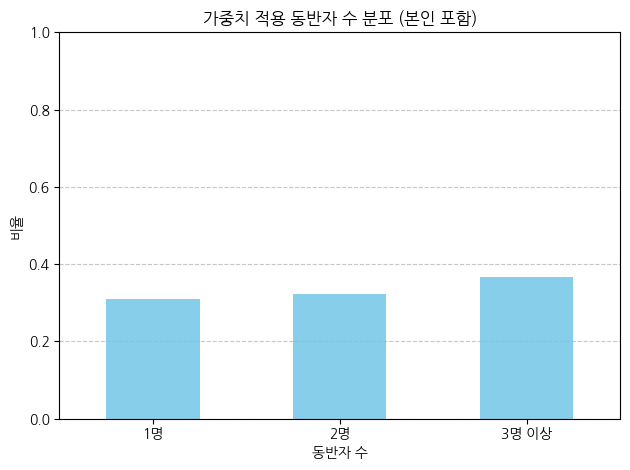

In [ ]:
import matplotlib.pyplot as plt

weighted_ratio.sort_index().plot(kind='bar', color='skyblue')
plt.title('가중치 적용 동반자 수 분포 (본인 포함)')
plt.ylabel('비율')
plt.xlabel('동반자 수')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

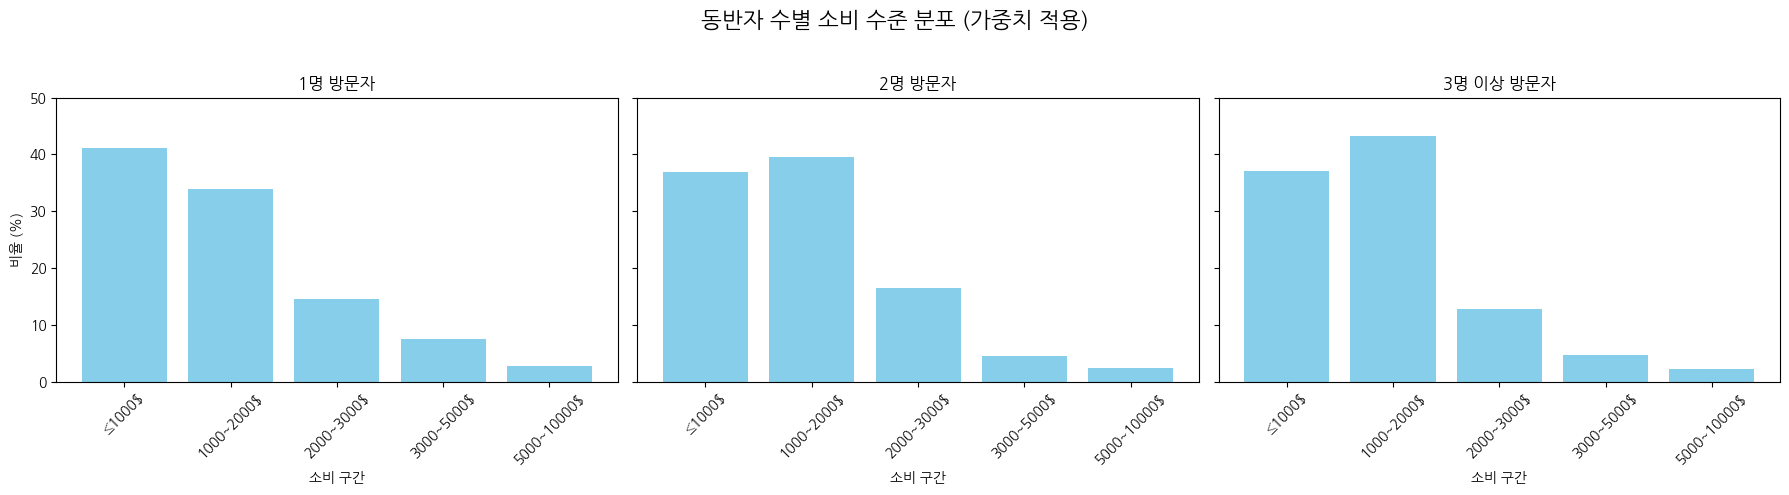

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 동반자 수 매핑
partner_map = {
    1: "1명",
    2: "2명",
    3: "3명 이상"
}
df_cluster1_2024['동반자수'] = df_cluster1_2024['RQ7_1'].map(partner_map)

# 소비 구간 매핑
cost_map = {
    1: "≤1000$",
    2: "1000~2000$",
    3: "2000~3000$",
    4: "3000~5000$",
    5: "5000~10000$",
    6: ">10000$",
    98: "초과금액"
}
df_cluster1_2024['소비구간'] = df_cluster1_2024['C총액1인TOT_개별국제교통비제외2'].map(cost_map)

# 소비구간 정렬
cost_order = ["≤1000$", "1000~2000$", "2000~3000$", "3000~5000$", "5000~10000$", ">10000$", "초과금액"]

# 서브플롯 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for idx, group in enumerate(["1명", "2명", "3명 이상"]):
    subset = df_cluster1_2024[df_cluster1_2024['동반자수'] == group]

    # 가중치 합산하여 비율 계산
    weighted = subset.groupby('소비구간')['weight'].sum()
    weighted_ratio = (weighted / weighted.sum()).reindex(cost_order)

    # 바 플롯
    axes[idx].bar(weighted_ratio.index, weighted_ratio.values * 100, color='skyblue')
    axes[idx].set_title(f"{group} 방문자")
    axes[idx].set_xlabel("소비 구간")
    axes[idx].set_ylabel("비율 (%)" if idx == 0 else "")
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].set_ylim(0, 50)

plt.suptitle("동반자 수별 소비 수준 분포 (가중치 적용)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 동반자 수별 개별여행 vs 기타 여행자 비율

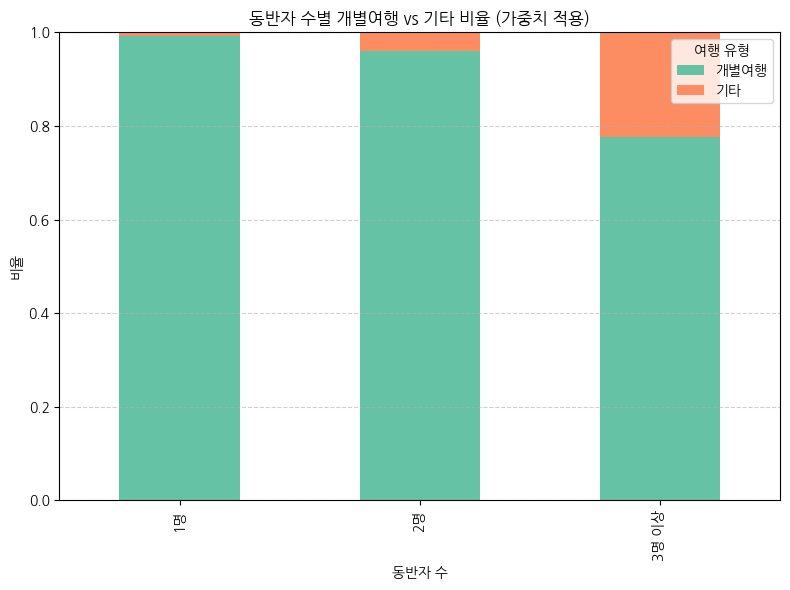

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 여행 유형 매핑
df_cluster1_2024['여행유형'] = df_cluster1_2024['TYP'].map(lambda x: '개별여행' if x == 1 else '기타')

# 동반자 수 매핑
partner_map = {
    1: "1명",
    2: "2명",
    3: "3명 이상"
}
df_cluster1_2024['동반자수'] = df_cluster1_2024['RQ7_1'].map(partner_map)

# 가중치 기반 비율 계산: 동반자수 X 여행유형 교차표
cross = df_cluster1_2024.pivot_table(
    index='동반자수',
    columns='여행유형',
    values='weight',
    aggfunc='sum',
    fill_value=0
)

# 비율로 변환
cross_ratio = cross.div(cross.sum(axis=1), axis=0)

# 누적 막대그래프
cross_ratio.loc[["1명", "2명", "3명 이상"]].plot(
    kind='bar',
    stacked=True,
    color=['#66c2a5', '#fc8d62'],
    figsize=(8, 6)
)

plt.title("동반자 수별 개별여행 vs 기타 비율 (가중치 적용)")
plt.ylabel("비율")
plt.xlabel("동반자 수")
plt.ylim(0, 1)
plt.legend(title="여행 유형", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 서울 제외 + 활동별 만족도 높은 지역 TOP5 추출

연관 분석에서 나온 활동

- 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)
- 고궁/역사 유적지 방문
- 박물관, 전시관 관람
- 자연경관 감상
- 식도락(음식/미식) 관광
- 쇼핑

In [ ]:
# 활동명 리스트 (2023, 2024 혼용 대비 포함)
target_activities = [
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "고궁/역사 유적지 방문",
    "박물관, 전시관 관람",
    "자연경관 감상",
    "식도락(음식/미식) 관광",
    "쇼핑"
]

# TOP5 추출 함수
def extract_top5_regions(df, activity_name):
    rows = []

    for _, row in df.iterrows():
        if activity_name in row.get("활동만족도", {}) and isinstance(row.get("방문지역", []), list):
            score = row["활동만족도"][activity_name]
            weight = row.get("weight", 1)
            for region in row["방문지역"]:
                if region != "서울":
                    rows.append({
                        "region": region,
                        "score": score,
                        "weight": weight
                    })

    region_df = pd.DataFrame(rows)

    if region_df.empty:
        return pd.DataFrame(columns=["region", "weighted_mean"])

    # 가중 평균 계산
    result = region_df.groupby("region").apply(
        lambda x: (x["score"] * x["weight"]).sum() / x["weight"].sum()
    ).reset_index(name="weighted_mean")

    # 상위 5개 추출
    top5 = result.sort_values(by="weighted_mean", ascending=False).head(5)
    return top5

# 사용
for activity in target_activities:
    print(f"\n[2023] {activity}")
    display(extract_top5_regions(df_cluster1_2023, activity))

    print(f"\n[2024] {activity}")
    display(extract_top5_regions(df_cluster1_2024, activity))



[2023] 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)


/tmp/ipython-input-10-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
8,세종,4.885176
14,충남,4.788340
1,경기,4.730498
3,경북,4.726867
10,인천,4.719335



[2024] 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)


,region,weighted_mean



[2023] 고궁/역사 유적지 방문


/tmp/ipython-input-10-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
3,경북,4.887813
9,울산,4.864068
2,경남,4.831557
11,전남,4.819289
14,충남,4.796136



[2024] 고궁/역사 유적지 방문


/tmp/ipython-input-10-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
5,대구,4.850040
11,전남,4.826619
10,인천,4.789105
3,경북,4.783998
2,경남,4.774665



[2023] 박물관, 전시관 관람


/tmp/ipython-input-10-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
6,대전,4.868428
12,전북,4.835955
8,세종,4.825091
11,전남,4.748051
14,충남,4.726340



[2024] 박물관, 전시관 관람


/tmp/ipython-input-10-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
11,전남,4.931324
0,강원,4.715650
14,충남,4.692815
3,경북,4.645970
1,경기,4.591794



[2023] 자연경관 감상


/tmp/ipython-input-10-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
14,충남,4.955245
11,전남,4.896798
12,전북,4.858308
3,경북,4.801124
4,광주,4.785059



[2024] 자연경관 감상


/tmp/ipython-input-10-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
11,전남,4.967052
9,울산,4.836546
10,인천,4.820824
0,강원,4.811608
4,광주,4.802472



[2023] 식도락(음식/미식) 관광


,region,weighted_mean



[2024] 식도락(음식/미식) 관광


/tmp/ipython-input-10-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
5,대구,4.772461
0,강원,4.685227
10,인천,4.661254
15,충북,4.653507
6,대전,4.646204



[2023] 쇼핑


/tmp/ipython-input-10-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
8,세종,4.802463
14,충남,4.762755
15,충북,4.688550
12,전북,4.623616
1,경기,4.607691



[2024] 쇼핑


/tmp/ipython-input-10-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
14,충남,4.825261
10,인천,4.597281
11,전남,4.576616
0,강원,4.572000
1,경기,4.558697


/tmp/ipython-input-11-4276491972.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


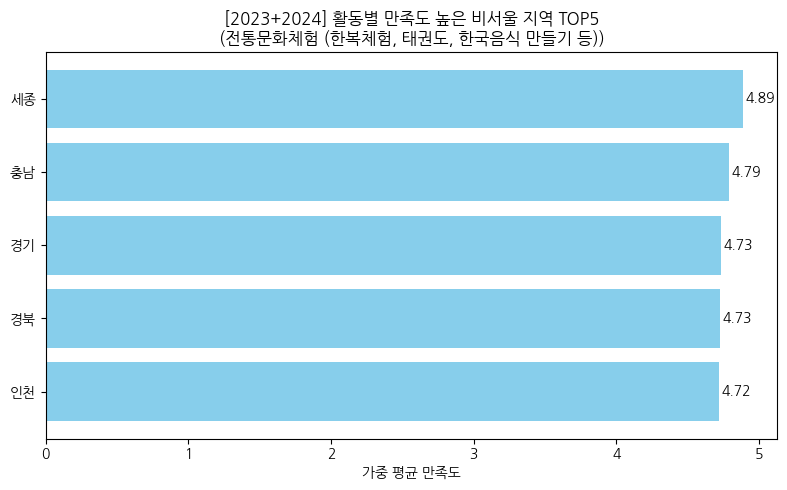

/tmp/ipython-input-11-4276491972.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


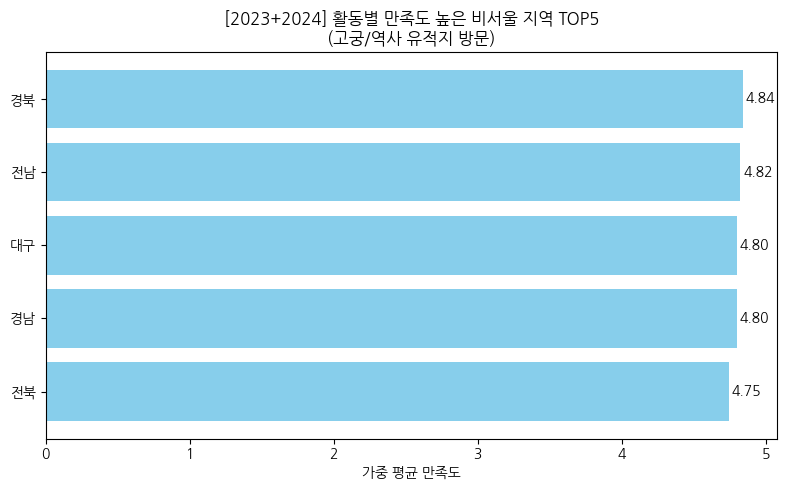

/tmp/ipython-input-11-4276491972.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


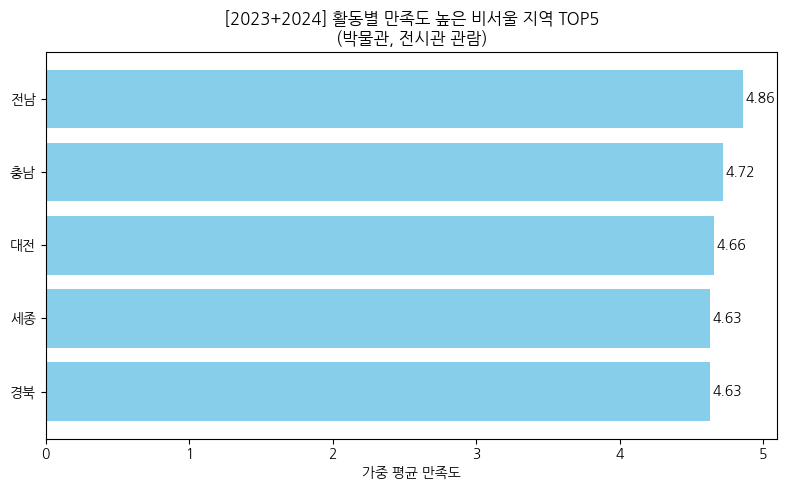

/tmp/ipython-input-11-4276491972.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


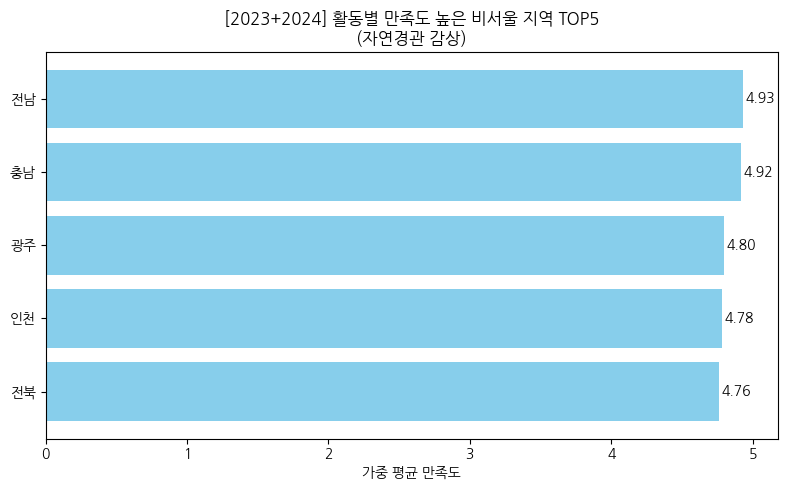

/tmp/ipython-input-11-4276491972.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


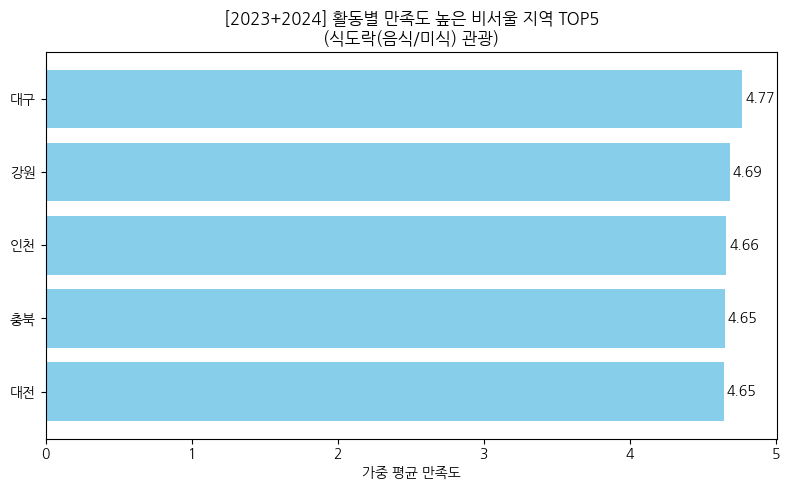

/tmp/ipython-input-11-4276491972.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


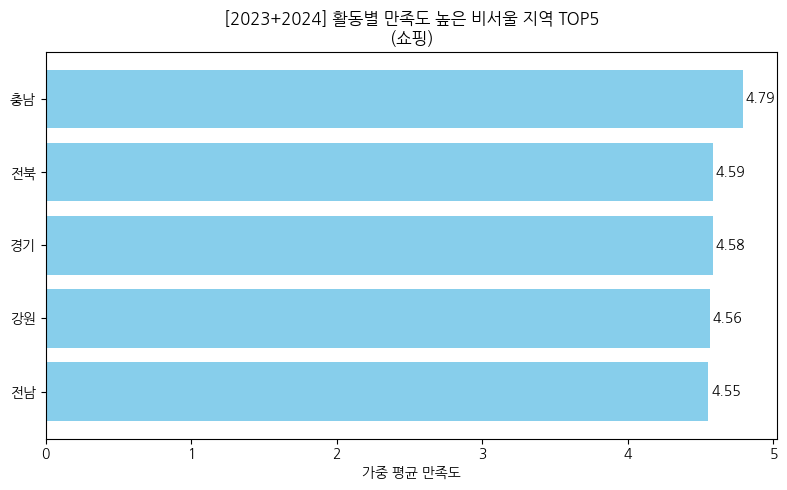

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 활동 리스트
target_activities = [
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "고궁/역사 유적지 방문",
    "박물관, 전시관 관람",
    "자연경관 감상",
    "식도락(음식/미식) 관광",
    "쇼핑"
]

# 2023, 2024 필요한 컬럼만 추출 후 병합
df_2023_trimmed = df_cluster1_2023[["활동만족도", "방문지역", "weight"]].copy()
df_2024_trimmed = df_cluster1_2024[["활동만족도", "방문지역", "weight"]].copy()
df_combined = pd.concat([df_2023_trimmed, df_2024_trimmed], ignore_index=True)

# TOP5 지역 추출 함수
def extract_top5_regions(df, activity_name):
    rows = []
    for _, row in df.iterrows():
        if activity_name in row.get("활동만족도", {}) and isinstance(row.get("방문지역", []), list):
            score = row["활동만족도"][activity_name]
            weight = row.get("weight", 1)
            for region in row["방문지역"]:
                if region != "서울":
                    rows.append({"region": region, "score": score, "weight": weight})
    region_df = pd.DataFrame(rows)
    if region_df.empty:
        return pd.DataFrame(columns=["region", "weighted_mean"])
    result = region_df.groupby("region").apply(
        lambda x: (x["score"] * x["weight"]).sum() / x["weight"].sum()
    ).reset_index(name="weighted_mean")
    return result.sort_values(by="weighted_mean", ascending=False).head(5)

# 시각화 with 수치 표시
for activity in target_activities:
    top5_df = extract_top5_regions(df_combined, activity)

    plt.figure(figsize=(8, 5))
    bars = plt.barh(top5_df["region"], top5_df["weighted_mean"], color="skyblue")
    plt.gca().invert_yaxis()
    plt.title(f"[2023+2024] 활동별 만족도 높은 비서울 지역 TOP5\n({activity})")
    plt.xlabel("가중 평균 만족도")

    # 바 안에 수치 표시
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.02, bar.get_y() + bar.get_height()/2,
                 f"{width:.2f}", va='center', ha='left', fontsize=10)

    plt.tight_layout()
    plt.show()

## 누적그래프

/tmp/ipython-input-12-1336316181.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot = df_expanded.groupby(['region', 'activity']).apply(


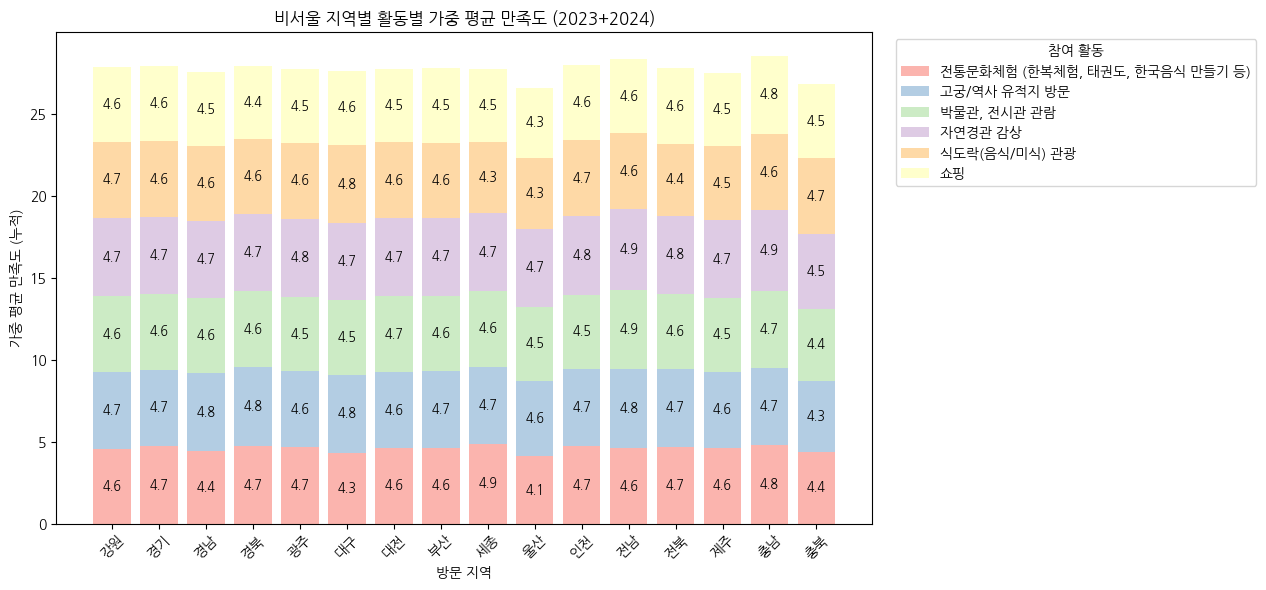

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 활동 리스트 정의
target_activities = [
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "고궁/역사 유적지 방문",
    "박물관, 전시관 관람",
    "자연경관 감상",
    "식도락(음식/미식) 관광",
    "쇼핑"
]

# 2. 2023, 2024 데이터에서 필요한 컬럼만 추출 후 결합
df_2023_trimmed = df_cluster1_2023[["활동만족도", "방문지역", "weight"]].copy()
df_2024_trimmed = df_cluster1_2024[["활동만족도", "방문지역", "weight"]].copy()
df_combined = pd.concat([df_2023_trimmed, df_2024_trimmed], ignore_index=True)

# 3. 활동-지역 데이터 펼치기
rows = []
for _, row in df_combined.iterrows():
    act_dict = row.get("활동만족도", {})
    regions = row.get("방문지역", [])
    weight = row.get("weight", 1)
    if isinstance(act_dict, dict) and isinstance(regions, list):
        for region in regions:
            if region != "서울":
                for act in target_activities:
                    if act in act_dict:
                        rows.append({
                            "region": region,
                            "activity": act,
                            "score": act_dict[act],
                            "weight": weight
                        })

df_expanded = pd.DataFrame(rows)

# 4. 지역-활동별 가중 평균 계산
pivot = df_expanded.groupby(['region', 'activity']).apply(
    lambda x: (x['score'] * x['weight']).sum() / x['weight'].sum()
).reset_index(name='weighted_mean')

# 5. 피벗 테이블 생성 (index=activity, columns=region)
pivot_table = pivot.pivot(index='activity', columns='region', values='weighted_mean').fillna(0)

# 6. 색상: 파스텔 컬러 사용
import matplotlib.cm as cm
colors = cm.Pastel1.colors  # 9가지 파스텔 컬러

# 7. 시각화 (세로 스택형 누적 막대그래프)
plt.figure(figsize=(max(10, len(pivot_table.columns) * 0.8), 6))
bottom = [0] * len(pivot_table.columns)
regions = pivot_table.columns.tolist()

for i, activity in enumerate(target_activities):
    values = pivot_table.loc[activity].values
    bars = plt.bar(regions, values, bottom=bottom, label=activity, color=colors[i % len(colors)])

    # 스택 내 수치 출력
    for j, (val, btm) in enumerate(zip(values, bottom)):
        if val > 0.3:
            plt.text(j, btm + val / 2, f"{val:.1f}", ha='center', va='center', fontsize=9, color='black')

    # 다음 스택 누적을 위해 bottom 업데이트
    bottom = [btm + val for btm, val in zip(bottom, values)]

plt.title("비서울 지역별 활동별 가중 평균 만족도 (2023+2024)")
plt.ylabel("가중 평균 만족도 (누적)")
plt.xlabel("방문 지역")
plt.xticks(rotation=45)
plt.legend(title="참여 활동", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 경남 또는 경상남도 포함 응답자 기준, 고궁/역사유적지 활동 만족 지역 분석


In [ ]:
# 만족활동 컬럼이 실제로 존재하고, 값이 리스트인지 확인
print("만족활동 타입:", df_all["만족활동"].apply(type).value_counts())

# 포함된 모든 고유 활동명을 확인해보자
unique_activities = set()
for acts in df_all["만족활동"]:
    if isinstance(acts, list):
        unique_activities.update(acts)

print("만족활동에 실제 들어 있는 값들:\n", unique_activities)


만족활동 타입: 만족활동
<class 'list'>    8450
Name: count, dtype: int64
만족활동에 실제 들어 있는 값들:
 {'유흥(나이트라이프 활동 및 카지노 등)', '비즈니스 전문활동(업무회의, 산업시설 시찰 등)', '국제회의(컨벤션, 국제회의, 전시 등)', '치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)', '오락(놀이공원 및 테마파크 방문 등)', '스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)', '식도락(음식/미식) 관광', '전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)', '박물관, 전시관 관람', '쇼핑', '고궁/역사 유적지 방문', '휴양/휴식(웰니스)', '연수, 교육, 연구', '기타', '자연경관 감상', '치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)', '연극, 뮤지컬, 발레 등 공연 관람', 'K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문', '스포츠/레포츠 관람 (야구, 축구, 농구 등)', '지역 축제 참여', '전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)', '유흥(나이트라이프 활동 및 카지노)', '뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)'}


In [ ]:
region_set = set()
for regions in df_all["방문지역"]:
    if isinstance(regions, list):
        region_set.update(regions)

print("방문지역 리스트에 있는 지역들:\n", region_set)


방문지역 리스트에 있는 지역들:
 {'대전', '서울', '광주', '부산', '충남', '경기', '강원', '충북', '전북', '울산', '경북', '인천', '대구', '세종', '경남', '제주', '전남'}


In [ ]:
# 조건 1: 고궁/역사 유적지 방문 활동 포함
cond1 = df_all["만족활동"].apply(lambda x: isinstance(x, list) and "고궁/역사 유적지 방문" in x)
print("조건1 - 고궁 활동 만족자 수:", cond1.sum())

# 조건 2: 경남 또는 경상남도 방문자
cond2 = df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_경남(x))
print("조건2 - 경남 방문자 수:", cond2.sum())

# 최종 AND 조건
final = df_all[cond1 & cond2]
print("🎯 최종 조건 만족 응답자 수:", len(final))


조건1 - 고궁 활동 만족자 수: 3513
조건2 - 경남 방문자 수: 139
🎯 최종 조건 만족 응답자 수: 34


In [ ]:
# 최종 조건 만족자 34명 확인
final = df_all[
    df_all["만족활동"].apply(lambda x: isinstance(x, list) and "고궁/역사 유적지 방문" in x) &
    df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_경남(x))
]

# Q9_1_1~Q9_1_5 값 확인
print("각 Q9_1_x 컬럼 값 샘플:")
for col in satisfied_cols:
    print(col, ":", final[col].dropna().unique())

각 Q9_1_x 컬럼 값 샘플:
Q9_1_1 : [50500 48509 26500 48511 48301 47054 48503 48501 47051 29500 11012 11910
 26513 48516 48009 41530 48001 47031 11005 11001 42002 48514 44504 26501
 11002 45001 41003]
Q9_1_2 : [11012. 47032. 11002. 11513.]
Q9_1_3 : [26006. 45502.]
Q9_1_4 : []
Q9_1_5 : []


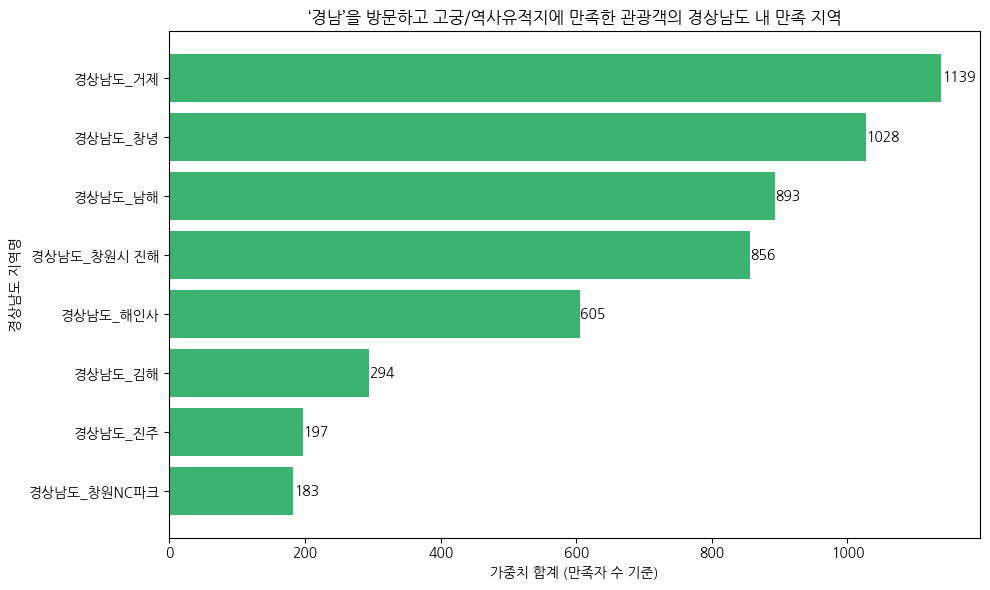

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 지역 만족 컬럼
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
target_activity = "고궁/역사 유적지 방문"

# 경상남도 지역코드 매핑
gyeongnam_code_map = {
    48501: "경상남도_거제",
    48502: "경상남도_양산시",
    48503: "경상남도_진주",
    48504: "경상남도_창원",
    48505: "경상남도_통영",
    48507: "경상남도_밀양",
    48508: "경상남도_사천",
    48509: "경상남도_남해",
    48510: "경상남도_함안",
    48511: "경상남도_창원시 진해",
    48512: "경상남도_창원시 마산합포구",
    48513: "경상남도_하동군",
    48514: "경상남도_김해",
    48515: "경상남도_합천군",
    48516: "경상남도_창녕",
    48517: "경상남도_산청군",
    48518: "경상남도_거창군",
    48519: "경상남도_고성군",
    48520: "경상남도_함양",
    48001: "경상남도_해인사",  # 관광지로 포함된 경남 코드
    48009: "경상남도_창원NC파크",
    48004: "경상남도_외도"
}

# 지역코드 set
gyeongnam_codes = set(gyeongnam_code_map.keys())

# 2023 + 2024 데이터 결합
df_all = pd.concat([df_cluster1_2023.copy(), df_cluster1_2024.copy()], ignore_index=True)

# 조건 필터: 만족활동에 고궁/역사유적지 포함 + 방문지역에 '경남' 포함
def contains_경남(region_list):
    return any(isinstance(val, str) and ('경남' in val or '경상남도' in val) for val in region_list)

filtered = df_all[
    df_all["만족활동"].apply(lambda x: isinstance(x, list) and target_activity in x) &
    df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_경남(x))
]

# rows 생성: 만족한 지역 중 '경상남도' 코드에 해당하는 경우만 추출
rows = []
for _, row in filtered.iterrows():
    weight = row.get("weight", 1)
    for col in satisfied_cols:
        val = row.get(col)
        try:
            val = int(float(val))  # float형도 안전하게 int로 변환
            if val in gyeongnam_codes:
                rows.append((val, weight))
        except:
            continue

# 데이터프레임으로 집계
df_satis = pd.DataFrame(rows, columns=["region_code", "weight"])
region_score = df_satis.groupby("region_code")["weight"].sum().sort_values(ascending=False)

# 코드 → 지역명으로 매핑
region_score_named = region_score.rename(index=gyeongnam_code_map)

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(region_score_named.index, region_score_named.values, color="mediumseagreen")
plt.gca().invert_yaxis()
plt.title("‘경남’을 방문하고 고궁/역사유적지에 만족한 관광객의 경상남도 내 만족 지역")
plt.xlabel("가중치 합계 (만족자 수 기준)")
plt.ylabel("경상남도 지역명")

# 수치 표시
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

| 지역명          | 고궁/역사유적지 관련성                  |
| ------------ | ----------------------------- |
| 경상남도\_거제     | ❓ 낮음 (자연경관/휴양 위주)             |
| 경상남도\_창녕     | ✅ 높음 (화왕산성, 도항리 고분군, 비화가야 고분) |
| 경상남도\_남해     | ❓ 자연경관 중심 (다랭이마을, 독일마을)       |
| 경상남도\_창원시 진해 | ❓ 벚꽃/군항제 등 계절성 테마             |
| 경상남도\_해인사    | ✅ 매우 높음 (팔만대장경, 세계유산)         |
| 경상남도\_김해     | ✅ 높음 (가야 유적지 중심)              |
| 경상남도\_진주     | ✅ 높음 (진주성, 논개, 임진왜란 유적지)      |
| 경상남도\_창원NC파크 | ❌ 없음 (야구장)                    |

## 경북

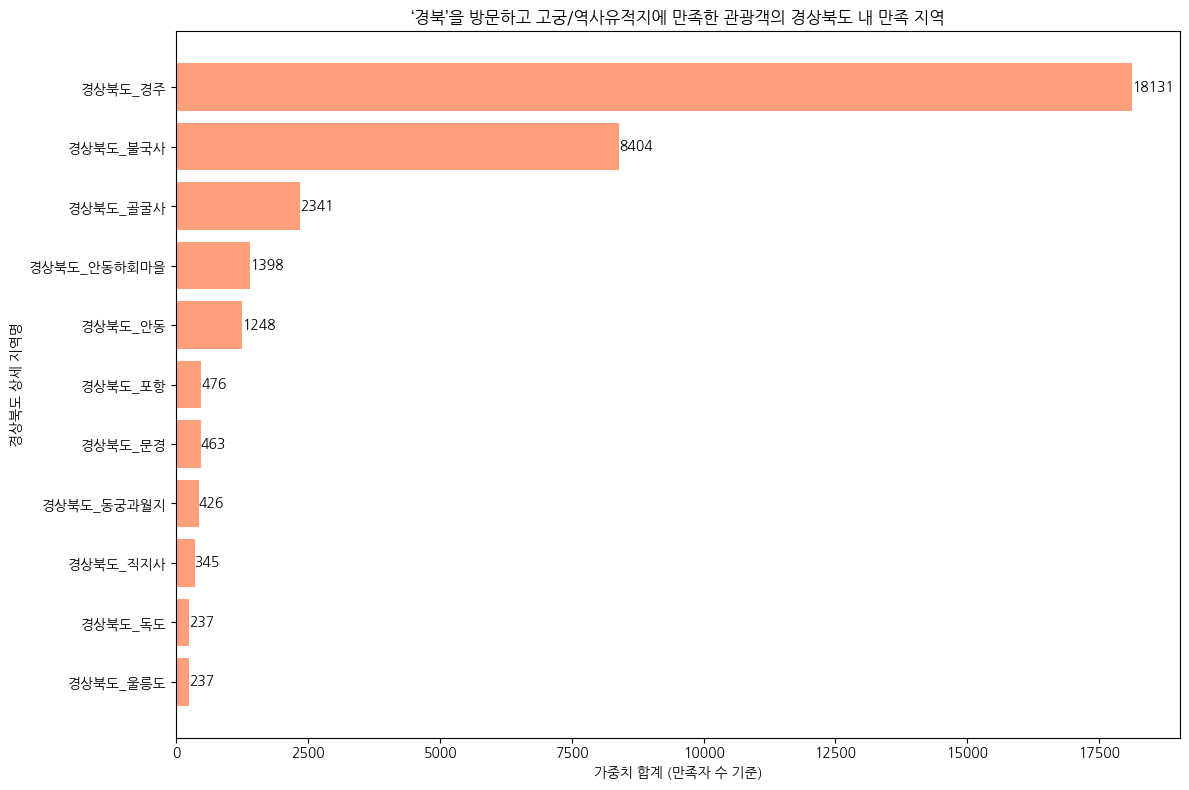

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 지역 만족 컬럼
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
target_activity = "고궁/역사 유적지 방문"

# 주신 경상북도 상세 지역 코드 매핑
gyeongbuk_code_map = {
    47001: "경상북도_안동하회마을", 47002: "경상북도_환호공원 스페이스워크",
    47003: "경상북도_포항공과대학교", 47004: "경상북도_불국사", 47005: "경상북도_금오산",
    47006: "경상북도_경주월드", 47007: "경상북도_골굴사", 47008: "경상북도_경주대릉원",
    47009: "경상북도_환호공원", 47010: "경상북도_호미곶 해맞이광장", 47011: "경상북도_경주 용은사",
    47012: "경상북도_팔공산국립공원", 47013: "경상북도_하동야생차밭", 47014: "경상북도_청도 운문사",
    47015: "경상북도_동궁과월지", 47016: "경상북도_경주 기림사", 47017: "경상북도_포항 영일대해수욕장",
    47018: "경상북도_직지사", 47019: "경상북도_경주 황남대총", 47020: "경상북도_경주국립박물관",
    47021: "경상북도_경주 첨성대", 47022: "경상북도_경주 남산", 47023: "경상북도_낙동강 자전거길",
    47024: "경상북도_경주 굴곡사", 47025: "경상북도_직지문화공원", 47026: "경상북도_경운대학교",
    47031: "경상북도_울릉도", 47032: "경상북도_독도", 47033: "경상북도_소백산풍기온천리조트",
    47051: "경상북도_경주", 47052: "경상북도_구미", 47053: "경상북도_포항", 47054: "경상북도_안동",
    47055: "경상북도_문경", 47056: "경상북도_고령군", 47057: "경상북도_칠곡", 47058: "경상북도_상주",
    47059: "경상북도_예천", 47500: "경상북도_경북",
    47901: "경상북도_맛집/카페", 47902: "경상북도_숙박시설", 47903: "경상북도_쇼핑시설",
    47904: "경상북도_전통시장", 47905: "경상북도_체험마을", 47906: "경상북도_종교시설",
    47907: "경상북도_교육기관", 47908: "경상북도_뷰티스파시설", 47909: "경상북도_오락시설",
    47910: "경상북도_유적지/문화재", 47911: "경상북도_바다", 47912: "경상북도_역/공항",
    47913: "경상북도_동물원/아쿠아리움", 47914: "경상북도_놀이/테마파크", 47915: "경상북도_문화시설",
    47916: "경상북도_전시관/박물관", 47917: "경상북도_레저스포츠", 47918: "경상북도_관공서",
    47919: "경상북도_공연장/팬미팅", 47920: "경상북도_공원/수목원", 47921: "경상북도_병원/약국"
}

# 지역코드 set
gyeongbuk_codes = set(gyeongbuk_code_map.keys())

# 2023 + 2024 데이터 결합
df_all = pd.concat([df_cluster1_2023.copy(), df_cluster1_2024.copy()], ignore_index=True)

# 조건 필터: 만족활동에 고궁/역사유적지 포함 + 방문지역에 '경북' 포함
def contains_경북(region_list):
    return any(isinstance(val, str) and ('경북' in val or '경상북도' in val) for val in region_list)

filtered = df_all[
    df_all["만족활동"].apply(lambda x: isinstance(x, list) and target_activity in x) &
    df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_경북(x))
]

# rows 생성: 만족한 지역 중 '경상북도' 코드에 해당하는 경우만 추출
rows = []
for _, row in filtered.iterrows():
    weight = row.get("weight", 1)
    for col in satisfied_cols:
        val = row.get(col)
        try:
            val = int(float(val))
            if val in gyeongbuk_codes:
                rows.append((val, weight))
        except:
            continue

# 집계
df_satis = pd.DataFrame(rows, columns=["region_code", "weight"])
region_score = df_satis.groupby("region_code")["weight"].sum().sort_values(ascending=False)

# 코드 → 지역명으로 매핑
region_score_named = region_score.rename(index=gyeongbuk_code_map)

# 시각화
plt.figure(figsize=(12, 8))
bars = plt.barh(region_score_named.index, region_score_named.values, color="lightsalmon")
plt.gca().invert_yaxis()
plt.title("‘경북’을 방문하고 고궁/역사유적지에 만족한 관광객의 경상북도 내 만족 지역")
plt.xlabel("가중치 합계 (만족자 수 기준)")
plt.ylabel("경상북도 상세 지역명")

# 수치 표시
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

- 관광지명 제외 지역명으로만 출력

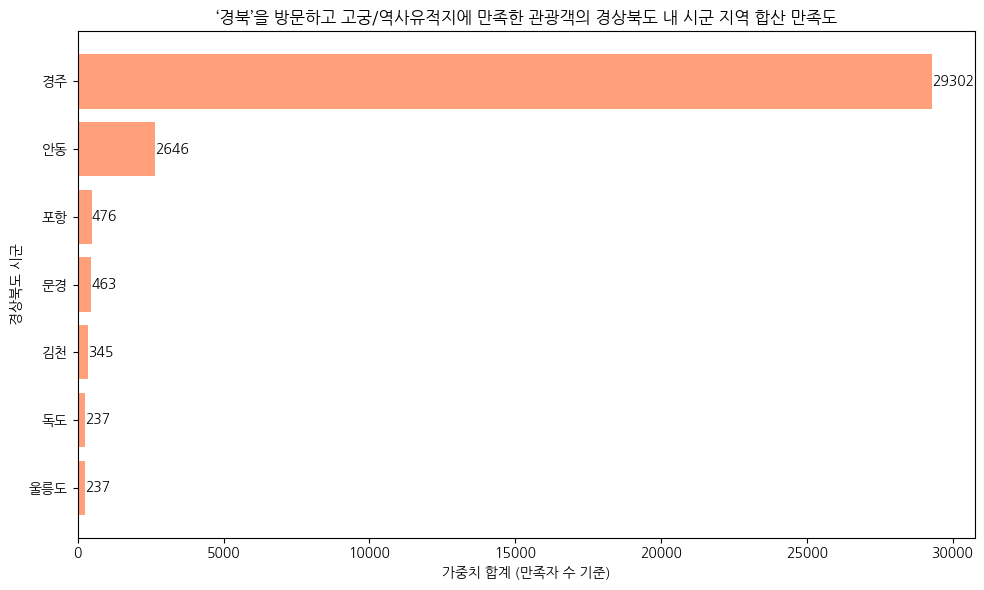

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 지역 만족 컬럼
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
target_activity = "고궁/역사 유적지 방문"

# 2. 경상북도 코드 매핑: 관광지 포함
gyeongbuk_code_map = {
    47001: "안동", 47002: "포항", 47003: "포항", 47004: "경주", 47005: "구미",
    47006: "경주", 47007: "경주", 47008: "경주", 47009: "포항", 47010: "포항",
    47011: "경주", 47012: "경산", 47013: "하동", 47014: "청도", 47015: "경주",
    47016: "경주", 47017: "포항", 47018: "김천", 47019: "경주", 47020: "경주",
    47021: "경주", 47022: "경주", 47023: "상주", 47024: "경주", 47025: "김천",
    47026: "구미", 47031: "울릉도", 47032: "독도", 47033: "영주",
    47051: "경주", 47052: "구미", 47053: "포항", 47054: "안동", 47055: "문경",
    47056: "고령군", 47057: "칠곡", 47058: "상주", 47059: "예천",
    47500: "경북",
    47901: "기타", 47902: "기타", 47903: "기타", 47904: "기타", 47905: "기타",
    47906: "기타", 47907: "기타", 47908: "기타", 47909: "기타", 47910: "기타",
    47911: "기타", 47912: "기타", 47913: "기타", 47914: "기타", 47915: "기타",
    47916: "기타", 47917: "기타", 47918: "기타", 47919: "기타", 47920: "기타",
    47921: "기타"
}

# 3. 지역 코드 목록
gyeongbuk_codes = set(gyeongbuk_code_map.keys())

# 4. 2023 + 2024 통합
df_all = pd.concat([df_cluster1_2023.copy(), df_cluster1_2024.copy()], ignore_index=True)

# 5. '경북' 방문자 필터 + 고궁/역사유적지 활동 포함자 필터
def contains_경북(region_list):
    return any(isinstance(val, str) and ('경북' in val or '경상북도' in val) for val in region_list)

filtered = df_all[
    df_all["만족활동"].apply(lambda x: isinstance(x, list) and target_activity in x) &
    df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_경북(x))
]

# 6. 지역코드 → 시군 매핑 + 가중치 합산
rows = []
for _, row in filtered.iterrows():
    weight = row.get("weight", 1)
    for col in satisfied_cols:
        val = row.get(col)
        try:
            val = int(float(val))
            if val in gyeongbuk_codes:
                region_name = gyeongbuk_code_map[val]
                rows.append((region_name, weight))
        except:
            continue

df_satis = pd.DataFrame(rows, columns=["region_name", "weight"])
region_score = df_satis.groupby("region_name")["weight"].sum().sort_values(ascending=False)

# 7. 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(region_score.index, region_score.values, color="lightsalmon")
plt.gca().invert_yaxis()
plt.title("‘경북’을 방문하고 고궁/역사유적지에 만족한 관광객의 경상북도 내 시군 지역 합산 만족도")
plt.xlabel("가중치 합계 (만족자 수 기준)")
plt.ylabel("경상북도 시군")

# 8. 수치 표기
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter

# 필터된 데이터에서 만족 지역 코드 전체 수집
codes = []
for _, row in filtered.iterrows():
    for col in satisfied_cols:
        val = row.get(col)
        try:
            val = int(float(val))
            codes.append(val)
        except:
            continue

# 가장 많이 나온 코드 Top 10
Counter(codes).most_common(10)

[(47051, 30),
 (11001, 10),
 (11012, 8),
 (26006, 6),
 (47004, 5),
 (11002, 4),
 (26013, 3),
 (11500, 3),
 (50500, 3),
 (11003, 3)]

# 전통문화체험-충남

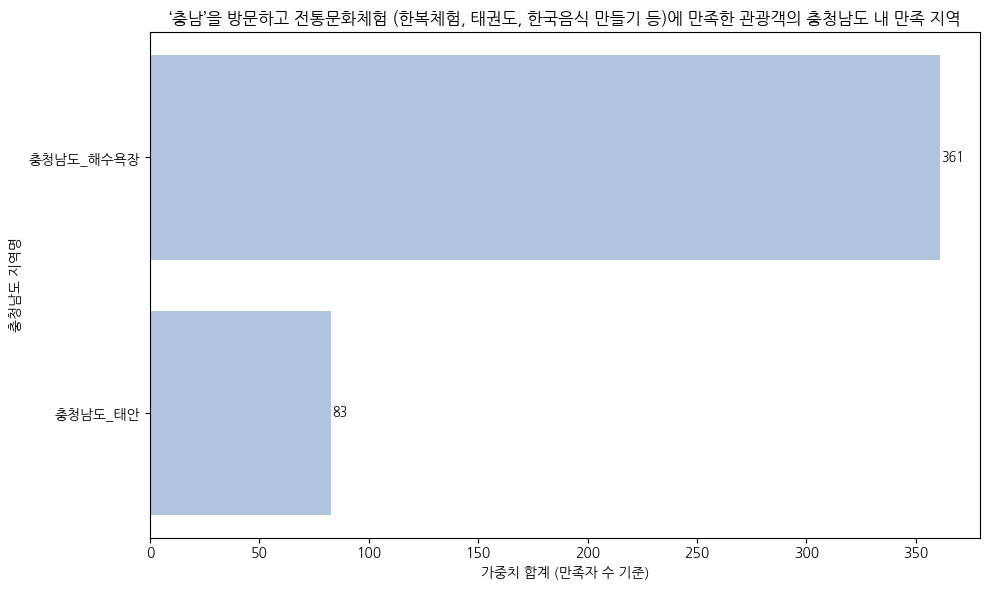

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 충청남도 지역 코드 매핑
chungnam_code_map = {
    44001: "충청남도_알프스마을", 44002: "충청남도_계룡산", 44003: "충청남도_아산 세계꽃식물원",
    44004: "충청남도_수덕사", 44005: "충청남도_현충사", 44006: "충청남도_천안 각원사",
    44011: "충청남도_코리아플라워파크", 44016: "충청남도_서산문화회관", 44017: "충청남도_부여 가림성",
    44018: "충청남도_백제군사박물관", 44019: "충청남도_안면도", 44020: "충청남도_천안 케이블워터파크",
    44021: "충청남도_천안 성불사", 44051: "충청남도_보령 대천해수욕장",
    44501: "충청남도_논산", 44502: "충청남도_서산", 44503: "충청남도_아산", 44504: "충청남도_천안",
    44505: "충청남도_태안", 44506: "충청남도_당진", 44507: "충청남도_보령", 44508: "충청남도_부여",
    44509: "충청남도_예산", 44510: "충청남도_공주", 44511: "충청남도_금산", 44512: "충청남도_청양군",
    44901: "충청남도_맛집/카페", 44902: "충청남도_숙박시설", 44903: "충청남도_쇼핑시설",
    44904: "충청남도_전통시장", 44905: "충청남도_체험마을", 44906: "충청남도_종교시설",
    44907: "충청남도_교육기관", 44908: "충청남도_뷰티스파시설", 44909: "충청남도_오락시설",
    44910: "충청남도_유적지", 44911: "충청남도_해수욕장", 44912: "충청남도_교통시설",
    44913: "충청남도_동물/아쿠아리움", 44914: "충청남도_놀이시설", 44915: "충청남도_문화시설",
    44916: "충청남도_박물관", 44917: "충청남도_레저스포츠", 44918: "충청남도_관공서",
    44919: "충청남도_공연장", 44920: "충청남도_공원/휴양림"
}

chungnam_codes = set(chungnam_code_map.keys())
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
target_activity = "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)"

# 충남 방문 필터 함수
def contains_chungnam(region_list):
    return any(isinstance(val, str) and ("충남" in val or "충청남도" in val) for val in region_list)

# 결합
df_all = pd.concat([df_cluster1_2023.copy(), df_cluster1_2024.copy()], ignore_index=True)

# 조건 필터링
filtered = df_all[
    df_all["만족활동"].apply(lambda x: isinstance(x, list) and target_activity in x) &
    df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_chungnam(x))
]

# 가중치를 포함한 지역 추출
rows = []
for _, row in filtered.iterrows():
    weight = row.get("weight", 1)
    for col in satisfied_cols:
        val = row.get(col)
        try:
            val = int(float(val))
            if val in chungnam_codes:
                rows.append((val, weight))
        except:
            continue

# 집계 및 매핑
df_satis = pd.DataFrame(rows, columns=["region_code", "weight"])
region_score = df_satis.groupby("region_code")["weight"].sum().sort_values(ascending=False)
region_score_named = region_score.rename(index=chungnam_code_map)

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(region_score_named.index, region_score_named.values, color="lightsteelblue")
plt.gca().invert_yaxis()
plt.title("‘충남’을 방문하고 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)에 만족한 관광객의 충청남도 내 만족 지역")
plt.xlabel("가중치 합계 (만족자 수 기준)")
plt.ylabel("충청남도 지역명")

for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.0f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# 만족활동에 전통문화체험이 포함되고, 충남을 방문한 응답자 중 일부를 샘플로 확인
sample = df_all[
    df_all["만족활동"].apply(lambda x: isinstance(x, list) and "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)" in x) &
    df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_chungnam(x))
].copy()

# 만족지역 코드와 매핑이 어떻게 되어 있는지 확인용
for idx, row in sample.iterrows():
    satis_codes = []
    for col in satisfied_cols:
        val = row.get(col)
        if pd.notna(val):
            try:
                code = int(float(val))
                region = chungnam_code_map.get(code, f"코드 {code}")
                satis_codes.append(region)
            except:
                continue
    print(f"\n[응답자 index: {idx}]")
    print("▶ 방문지역:", row.get("방문지역"))
    print("▶ 만족활동:", row.get("만족활동"))
    print("▶ 만족지역:", satis_codes)


[응답자 index: 739]
▶ 방문지역: ['서울', '대전', '충남', '전남']
▶ 만족활동: ['자연경관 감상', '고궁/역사 유적지 방문', '전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)']
▶ 만족지역: ['충청남도_태안']

[응답자 index: 2340]
▶ 방문지역: ['서울', '충남']
▶ 만족활동: ['전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)', '쇼핑', '유흥(나이트라이프 활동 및 카지노 등)']
▶ 만족지역: ['코드 11030']

[응답자 index: 2808]
▶ 방문지역: ['충남', '부산']
▶ 만족활동: ['박물관, 전시관 관람', '전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)', '쇼핑']
▶ 만족지역: ['코드 26920']

[응답자 index: 3369]
▶ 방문지역: ['서울', '충남']
▶ 만족활동: ['고궁/역사 유적지 방문', '전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)', '박물관, 전시관 관람']
▶ 만족지역: ['코드 11001', '코드 11083']

[응답자 index: 3470]
▶ 방문지역: ['서울', '충남']
▶ 만족활동: ['쇼핑', '전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)', '비즈니스 전문활동(업무회의, 산업시설 시찰 등)']
▶ 만족지역: ['충청남도_해수욕장', '코드 11003']


충남에서 전통문화체험을 경험하고 만족한 응답자는 극히 일부이며,
그 중에서도 지역 만족 코드를 충남으로 찍은 사람은 2명(태안, 해수욕장) 정도입니다.

따라서 이전 시각화에서 해수욕장이 상위에 보였던 건 데이터가 잘못된 게 아니라,
단순히 응답자가 적고 샘플 수가 작기 때문에 생긴 현상으로 해석하는 것이 맞습니다.

In [ ]:
# 필요한 라이브러리
import pandas as pd

# 만족 지역 컬럼 및 매핑 함수 정의
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
target_activity = "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)"

# 충남 방문 필터 함수
def contains_chungnam(region_list):
    return any(isinstance(val, str) and ("충남" in val or "충청남도" in val) for val in region_list)

# 대상 응답자 전체 필터링
sample_all = df_all[
    df_all["만족활동"].apply(lambda x: isinstance(x, list) and target_activity in x) &
    df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_chungnam(x))
].copy()

# 응답자별 정보 정리
records = []
for idx, row in sample_all.iterrows():
    satis_codes = []
    for col in satisfied_cols:
        val = row.get(col)
        if pd.notna(val):
            try:
                code = int(float(val))
                region = chungnam_code_map.get(code, f"코드 {code}")
                satis_codes.append(region)
            except:
                continue
    records.append({
        "index": idx,
        "방문지역": row.get("방문지역"),
        "만족활동": row.get("만족활동"),
        "만족지역": satis_codes
    })

# 결과 데이터프레임 생성 및 출력
df_result = pd.DataFrame(records)
display(df_result)

,index,방문지역,만족활동,만족지역
0,739,"[서울, 대전, 충남, 전남]","[자연경관 감상, 고궁/역사 유적지 방문, 전통문화체험 (한복체험, 태권도, 한국음...",[충청남도_태안]
1,2340,"[서울, 충남]","[전통문화체험 (한복체험, 태권도, 한국음식 만들기 등), 쇼핑, 유흥(나이트라이프...",[코드 11030]
2,2808,"[충남, 부산]","[박물관, 전시관 관람, 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등), 쇼핑]",[코드 26920]
3,3369,"[서울, 충남]","[고궁/역사 유적지 방문, 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등),...","[코드 11001, 코드 11083]"
4,3470,"[서울, 충남]","[쇼핑, 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등), 비즈니스 전문활동...","[충청남도_해수욕장, 코드 11003]"


# 전통문화체험 - 세종

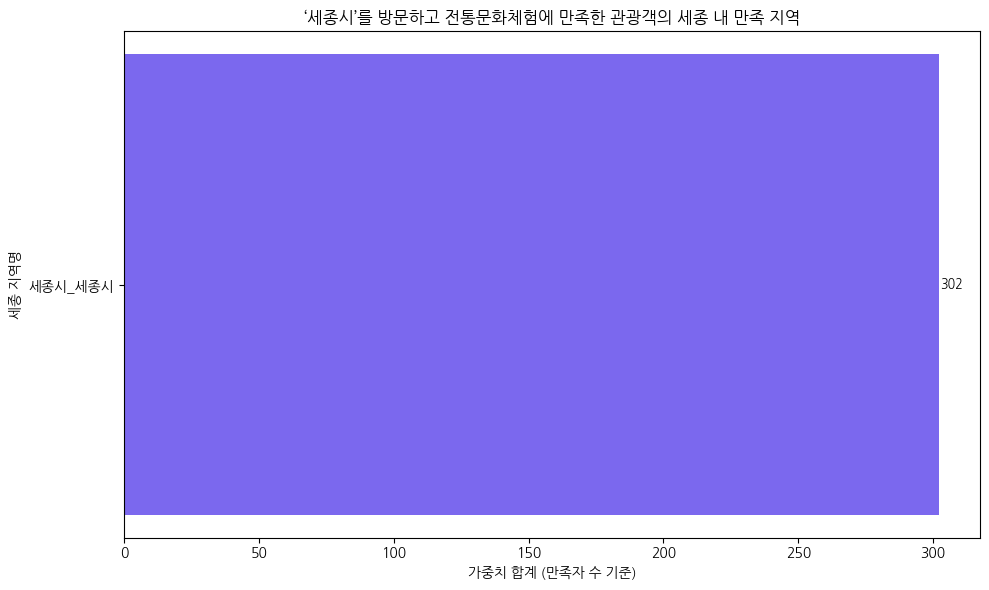

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 세종 지역 코드 매핑
sejong_code_map = {
    32500: "세종시_세종시",
    32901: "세종시_맛집/카페/주점",
    32902: "세종시_숙박시설",
    32903: "세종시_쇼핑시설",
    32904: "세종시_전통시장",
    32905: "세종시_체험마을",
    32906: "세종시_종교시설",
    32907: "세종시_교육기관",
    32908: "세종시_뷰티스파시설",
    32909: "세종시_오락시설",
    32910: "세종시_유적지/문화재",
    32911: "세종시_해수욕장",
    32912: "세종시_교통시설",
    32913: "세종시_동물/아쿠아리움",
    32914: "세종시_놀이/테마공원",
    32915: "세종시_문화시설",
    32916: "세종시_박물관",
    32917: "세종시_레저스포츠",
    32918: "세종시_관공서",
    32919: "세종시_공연장",
    32920: "세종시_공원/휴양림",
    32921: "세종시_병원/약국"
}

sejong_codes = set(sejong_code_map.keys())
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
target_activity = "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)"

# 세종 방문 필터
def contains_sejong(region_list):
    return any(isinstance(val, str) and ("세종" in val or "세종시" in val or "세종특별자치시" in val) for val in region_list)

# 데이터 결합
df_all = pd.concat([df_cluster1_2023.copy(), df_cluster1_2024.copy()], ignore_index=True)

# 필터링: 전통문화체험 만족 + 세종 방문
filtered = df_all[
    df_all["만족활동"].apply(lambda x: isinstance(x, list) and target_activity in x) &
    df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_sejong(x))
]

# 만족 지역 코드 추출 및 가중치 집계
rows = []
for _, row in filtered.iterrows():
    weight = row.get("weight", 1)
    for col in satisfied_cols:
        val = row.get(col)
        try:
            val = int(float(val))
            if val in sejong_codes:
                rows.append((val, weight))
        except:
            continue

# 집계 및 지역명 매핑
df_satis = pd.DataFrame(rows, columns=["region_code", "weight"])
region_score = df_satis.groupby("region_code")["weight"].sum().sort_values(ascending=False)
region_score_named = region_score.rename(index=sejong_code_map)

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(region_score_named.index, region_score_named.values, color="mediumslateblue")
plt.gca().invert_yaxis()
plt.title("‘세종시’를 방문하고 전통문화체험에 만족한 관광객의 세종 내 만족 지역")
plt.xlabel("가중치 합계 (만족자 수 기준)")
plt.ylabel("세종 지역명")

for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.0f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 1. 만족 지역 컬럼 및 대상 활동명
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
target_activity = "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)"

# 2. 세종시 코드 매핑
sejong_code_map = {
    32500: "세종시_세종시",
    32901: "세종시_맛집/카페/주점", 32902: "세종시_숙박시설", 32903: "세종시_쇼핑시설",
    32904: "세종시_전통시장", 32905: "세종시_체험마을", 32906: "세종시_종교시설",
    32907: "세종시_교육기관", 32908: "세종시_뷰티스파시설", 32909: "세종시_오락시설",
    32910: "세종시_유적지/문화재", 32911: "세종시_바다", 32912: "세종시_교통시설",
    32913: "세종시_동물/식물원", 32914: "세종시_놀이/테마공원", 32915: "세종시_문화시설",
    32916: "세종시_전시관/박물관", 32917: "세종시_레저스포츠", 32918: "세종시_관공서",
    32919: "세종시_공연장", 32920: "세종시_공원/수목원/휴양림", 32921: "세종시_병원/약국"
}
sejong_codes = set(sejong_code_map.keys())

# 3. 세종 방문 필터 함수
def contains_sejong(region_list):
    return any(isinstance(val, str) and ("세종" in val or "세종시" in val) for val in region_list)

# 4. 응답자 필터링 (만족활동 + 방문지역)
sample_sejong = df_all[
    df_all["만족활동"].apply(lambda x: isinstance(x, list) and target_activity in x) &
    df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_sejong(x))
].copy()

# 5. 만족 지역 코드 해석
records = []
for idx, row in sample_sejong.iterrows():
    satis_codes = []
    for col in satisfied_cols:
        val = row.get(col)
        if pd.notna(val):
            try:
                code = int(float(val))
                region = sejong_code_map.get(code, f"코드 {code}")
                satis_codes.append(region)
            except:
                continue
    records.append({
        "index": idx,
        "방문지역": row.get("방문지역"),
        "만족활동": row.get("만족활동"),
        "만족지역": satis_codes
    })

# 6. 출력 (DataFrame 형태)
df_sejong_result = pd.DataFrame(records)
display(df_sejong_result)

,index,방문지역,만족활동,만족지역
0,88,"[강원, 세종]","[오락(놀이공원 및 테마파크 방문 등), 자연경관 감상, 전통문화체험 (한복체험, ...",[코드 42502]
1,1325,"[서울, 세종]","[쇼핑, 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)]",[세종시_세종시]
2,3200,"[서울, 경기, 강원, 세종, 대구, 부산, 전북]","[전통문화체험 (한복체험, 태권도, 한국음식 만들기 등), 식도락(음식/미식) 관광...",[코드 45502]
3,4287,"[서울, 경기, 강원, 세종, 대구, 부산]","[고궁/역사 유적지 방문, 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등),...",[코드 26500]
